## データのクリーニングと基礎解析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

books = pd.read_csv('data/books.csv')
books.head(10)

,title,authors,price,published_date,head,detail,icons,ebook,csv,num
0,家なき子〔上〕,\nエクトール・マロ／著\n 、村松潔／訳\n ...,767円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,0
1,家なき子〔下〕,\nエクトール・マロ／著\n 、村松潔／訳\n ...,853円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,1
2,堕落刑事―マンチェスター市警 エイダン・ウェイツ―,\nジョセフ・ノックス／著\n 、池田真紀子／訳\n ...,"1,015円（税込）",発売日：2019/09/01,NaN,NaN,[],False,0,2
3,魔弾の射手―天久鷹央の事件カルテ―,\n知念実希人／著\n,680円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,3
4,さよならの言い方なんて知らない。,\n河野裕／著\n,637円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,4
5,君と漕ぐ2―ながとろ高校カヌー部と強敵たち―,\n武田綾乃／著\n,637円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,5
6,ベルサイユのゆり―マリー・アントワネットの花籠―,\n吉川トリコ／著\n,637円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,6
7,犯人ＩＡのインテリジェンス・アンプリファー―探偵ＡＩ ２―,\n早坂吝／著\n,594円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,7
8,源氏姉妹,\n酒井順子／著\n,594円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,8
9,変見自在 習近平と朝日、どちらが本当の反日か,\n高山正之／著\n,529円（税込）,発売日：2019/09/01,NaN,NaN,[],False,0,9


データ取得の際に利用した`csv`コラムと`num`コラムはもはや必要ないので、ここで削除しておく。

In [2]:
books.drop(columns=['csv', 'num'], inplace=True)

### タイトルのクリーニング

In [3]:
books['title'].value_counts()

劇場                                  8
朝が来るまでそばにいる                         8
狂うひと―「死の棘」の妻・島尾ミホ―                  8
ここは私たちのいない場所                        8
東京湾景                                8
源氏姉妹                                8
堕落刑事―マンチェスター市警 エイダン・ウェイツ―           7
家なき子〔下〕                             7
日向坂46ファースト写真集　立ち漕ぎ                  7
スタン・ゲッツ―音楽を生きる―                     7
犯人ＩＡのインテリジェンス・アンプリファー―探偵ＡＩ ２―       7
ベルサイユのゆり―マリー・アントワネットの花籠―            7
変見自在　習近平と朝日、どちらが本当の反日か              7
家なき子〔上〕                             7
十津川警部 長良川心中                         7
魔弾の射手―天久鷹央の事件カルテ―                   7
さよならの言い方なんて知らない。                    7
きえもの                                7
君と漕ぐ2―ながとろ高校カヌー部と強敵たち―              7
命あれば                                7
みずうみ                                4
博士の愛した数式                            3
言葉の海へ                               3
おめでとう                               3
青い鳥                                 3
釈迦                                  3
藤村のパリ       

In [4]:
books[books['title']=='劇場']

,title,authors,price,published_date,head,detail,icons,ebook
10,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False
1184,劇場,\n又吉直樹／著\n,"1,404円（税込）",発売日：2017/05/11,一番会いたい人に会いに行く。\r\nこんな当たり前のことが、なんでできへんかったんやろな。,演劇を通して世界に立ち向かう永田と、その恋人の沙希。夢を抱いてやってきた東京で、ふたりは出会...,['特設特設ページ公開中！'],False
9871,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False
9891,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False
9911,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False
9931,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False
9951,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False
9971,劇場,\n又吉直樹／著\n,529円（税込）,発売日：2019/09/01,一番会いたい人に会いに行く。こんな当たり前のことが、なんでできへんかったんやろな。,高校卒業後、大阪から上京し劇団を旗揚げした永田と、大学生の沙希。それぞれ夢を抱いてやってきた...,"['イベント岸政彦×又吉直樹\r\n「土地を描くということ――大阪で生きる／沖縄を思う」',...",False


同一の書籍が複数行存在している模様。

In [5]:
books[books['title']=='みずうみ']

,title,authors,price,published_date,head,detail,icons,ebook
5215,みずうみ,\nよしもとばなな／著\n,562円（税込）,発売日：2008/12/01,いったいこの体と心はどれだけのことを受け止めてきたのだろう……。狂気と溺愛に損なわれた幼い魂...,大好きなママが、パパとの自由な恋をつらぬいてこの世を去った。ひとりぼっちになったいま、ちひろ...,[],False
7556,みずうみ,\nシュトルム／著\n 、高橋義孝／訳\n ...,"1,620円（税込）",発売日：2001/10/05,若き日の恋人に寄せるはかない老人の思いを綴る表題作ほか、2編を収録。いずれも詩情あふれる美し...,故郷を離れている間に友人と結婚した恋人に、美しい湖のほとりで再会したラインハルトは、過ぎ去っ...,[],False
7563,みずうみ,シュトルム／著、高橋義孝／訳,270円（希望小売価格）,配信開始日：2001/10/05,若き日の恋人に寄せるはかない老人の思いを綴る表題作ほか、２編を収録。いずれも詩情あふれる美し...,故郷を離れている間に友人と結婚した恋人に、美しい湖のほとりで再会したラインハルトは、過ぎ去っ...,False,True
9645,みずうみ,\n川端康成／著\n,464円（税込）,発売日：1960/12/27,【ノーベル賞作家が描く夢幻的エロティシズムの傑作】その長靴を脱がせて女の足を見てみたい――。...,美しい少女を見ると、憑かれたように後をつけてしまう男、桃井銀平。教え子と恋愛事件を起こして教...,[],False


同名の書籍であっても、著者の異なる書籍も存在するので、タイトルと著者名がどちらも同じものを削除したい。

著者名を判別できるように、まずは著者名のクリーニングする。

### 著者名のクリーニング

In [6]:
books['authors'] = books['authors'].str.replace(' ', '').str.replace('\n', '').str.split(pat='、')

In [7]:
books['authors'].apply(len).value_counts()

1     8348
2     1328
3      191
4       40
5       31
6       21
9        8
7        5
8        5
10       2
13       1
12       1
Name: authors, dtype: int64

In [8]:
people = {}
p_type = {}
authors = books['authors'].tolist()
authors
for author in authors:
    for a in author:
        a = a.split('／')
        if len(a)==1:
            continue
        if a[0] in people:
            people[a[0]] += 1
        else:
            people[a[0]] = 1
        if a[1] in p_type:
            p_type[a[1]] += 1
        else:
            p_type[a[1]] = 1

people_s = pd.Series(people)
p_type_s = pd.Series(p_type)

people_s.sort_values(ascending=False)

塩野七生             134
山本周五郎            123
池波正太郎            103
村上春樹              98
松本清張              89
三島由紀夫             82
山崎豊子              79
司馬遼太郎             77
星新一               71
井上靖               69
瀬戸内寂聴             67
小林秀雄              66
遠藤周作              65
吉村昭               64
筒井康隆              61
井上ひさし             55
乃南アサ              53
宮本輝               53
白洲正子              53
宮部みゆき             52
安部公房              50
宮城谷昌光             48
北杜夫               46
畠中恵               46
重松清               44
城山三郎              43
西村京太郎             43
阿川弘之              43
藤沢周平              43
沢木耕太郎             43
                ... 
小田雅久仁              1
グレン・フランクル          1
白石一郎               1
渡辺葉                1
名越健郎               1
小駒勝美               1
東国原英夫              1
大場大                1
ウィリアム・トレヴァー        1
天沼春樹               1
日本テレビ報道局天皇取材班      1
松木秀文               1
夜久恭裕               1
与謝野馨               1
福岡耕造               1
石原まこちん             1
平塚隼介         

In [9]:
p_type_s.sort_values(ascending=False).head(10)

著     10011
訳       981
編       262
朗読      173
原作      151
校注      108
監修       79
講演       48
出演       45
解説       18
dtype: int64

In [10]:
(p_type_s/p_type_s.sum() *100).sort_values(ascending=False).head(10)

著     82.851941
訳      8.118845
編      2.168336
朗読     1.431764
原作     1.249690
校注     0.893818
監修     0.653811
講演     0.397252
出演     0.372424
解説     0.148970
dtype: float64

作品の関係者としては、著者が82.9%、訳者が8.0%となっている。編集者や朗読者などもいる。
興味の対象は著者なので、この先`books`の解析には、著者のみを扱うこととする。

また、複数の著者による共同執筆もあるようだが、この場合には一番最初に列挙されている著者を代表者として扱うようにする。

In [11]:
books['authors'] = books['authors'].apply(lambda x: x[0]).str.replace(r'／.', '' )

## 著者が何冊書籍を出版しているのかを解析

In [12]:
people_s.describe()

count    3579.000000
mean        3.376083
std         7.443129
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       134.000000
dtype: float64

作家の大半は4冊も本を出版していないことがわかる。

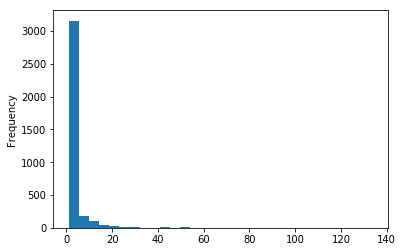

In [13]:
people_s.plot.hist(bins=30)

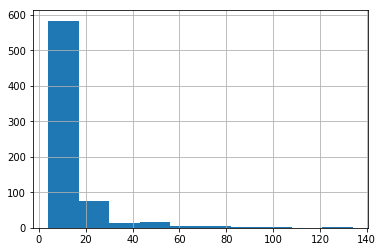

In [14]:
people_s[people_s>=4].hist()

In [15]:
people_s[people_s>=4].describe()

count    701.000000
mean      11.527817
std       14.095628
min        4.000000
25%        5.000000
50%        7.000000
75%       13.000000
max      134.000000
dtype: float64

4冊以上本を出版している作家は690人もいて、4冊以上出版している作家の平均出版冊数は11.5。
12冊くらい本を出版しないと、まだまだ「並の作家」なのかもしれない。

In [16]:
people_s[people_s>=12].count()

194

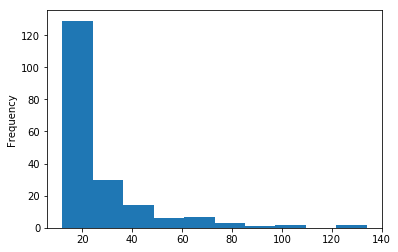

In [17]:
people_s[people_s>=12].plot.hist()

12冊以上出版している作家は過去に187人いる。
必ずしも出版した本の種類が重要なわけではないが、本の種類だけ考えてみると、飛び抜けた作家になるためには12冊では物足りない印象。

多数本を出版している作家の名前を見てみると、かなり古い作家もいるため、作家としての活動年数なども考慮に入れる必要がありそう。

## タイトルと著者名でクリーニング

同一の書籍が複数行存在していた。価格と発売日が異なる同一書籍もあるので、タイトルと著者名の一致している重複の行は削除する。

In [40]:
books.drop_duplicates(subset=['title', 'authors'], inplace=True)

In [69]:
people_set = set([])
people_list = books['authors'].tolist()
for p_l in people_list:
    people_set.add(p_l)

people_dup = {}

for p_l in people_set:
    for p_l2 in people_set:
        if p_l!=p_l2 and p_l in p_l2:
            if p_l in people_dup:
                people_dup[p_l] = [people_dup[p_l], p_l2]
            else:
                people_dup[p_l]=p_l2

print(people_dup)

{'田村泰次郎': '田村泰次郎作', '石川啄木': '石川啄木作', '柳井正': '柳井正修', '曽野綾子': '曽野綾子演', '宮本輝': '宮本輝作', '江戸川乱歩': '江戸川乱歩作', '週刊新潮': '「週刊新潮」編集部', '渡辺実': '渡辺実注', 'NHKスペシャル取材班': 'NHKスペシャル取材班著', '藤沢周平': '藤沢周平作', 'ゴールズワージー': 'ジョン・ゴールズワージー', '谷崎潤一郎': '谷崎潤一郎作', '崇史': '高田崇史', '三島由紀夫': ['三島由紀夫作', '三島由紀夫演'], '出川直樹': '出川直樹修', '田山花袋': '田山花袋作', 'さだまさし': 'さだまさしり', 'フローベール': 'Ｇ・フローベール', '井上靖': ['井上靖演', '井上靖作'], '樋口一葉': '樋口一葉作', '池田晶子': '池田晶子・著', '城山三郎': '城山三郎演', '藤沢周': ['藤沢周平', '藤沢周平作'], '斎藤茂吉': '斎藤茂吉作', '北原白秋': '北原白秋作', '柳田由紀子': '柳田由紀子ンタビュー・文', '五木寛之': '五木寛之作', '小林秀雄': [['小林秀雄演', '新潮社小林秀雄全集編集室'], '小林秀雄義'], '向田邦子': ['向田邦子演', '向田邦子作'], '北杜夫': '北杜夫作', '伊集院静': '伊集院静説', '吉行淳之介': '吉行淳之介作', '幸田文': '幸田文作', '後深草院二条': '後深草院二条作', '永井荷風': '永井荷風作', '河合隼雄': ['河合隼雄話解説', '河合隼雄生'], '山田豊': '山田豊文', '夏目漱石': '夏目漱石作', 'ドストエフスキー': 'ドストエフスキー作', '宇野千代': '宇野千代作', '井伏鱒二': '井伏鱒二作', '泉鏡花': '泉鏡花作', '小川洋子': '小川洋子作', '与謝野晶子': '与謝野晶子作', '小林多喜二': '小林多喜二作', 'ヘッセ': 'ヘルマン・ヘッセ', '山崎豊子': '山崎豊子作', '開高健': ['開高健演', '開高健作'], '坂口安吾': '坂口安吾作', '坪田譲治': '坪田譲治作', '梶井

著者名には、「〜作」や「〜演」などの表記がされているものがあることがわかる。

'雪舟': '雪舟えま'
'スティーヴンソン': 'ロバート・L・スティーヴンソン'

など、簡略化表示されたものもあるが、全て短い方の表記に変更しても大きな支障はなさそうなので、著者名を短い表記のものを採用する。

In [82]:
def name_check(string):
    for p_s in people_set:
        if p_s!=string and p_s in string:
            return p_s
        else:
            return string

books['authors'] = books['authors'].apply(name_check)

In [83]:
books[books['authors'].str.contains('水上勉作')]

,title,authors,price,published_date,head,detail,icons,ebook,year
7162,雁の寺,水上勉作,4644,2002-11-20,NaN,和尚の内妻に犯された時、母を知らない小坊主慈念の心に恐ろしい企みが芽生えた……。自身の体験を...,[],False,2002


### 価格のクリーニング

In [18]:
books[books['price']=='False'].head()

,title,authors,price,published_date,head,detail,icons,ebook
58,新潮新書 解説目録（2019年4月）,新潮新書編集部,False,配信開始日：2019/07/26,話題作・名作・問題作ぞろいの800点超を網羅！ 読みたい１冊、読み返したい１冊が見つかる。,2003年4月に創刊された新潮新書。創刊ラインナップの一冊として刊行された『バカの壁』が40...,False,True
70,yom yomリーフレット vol.56,「yomyom」編集部,False,配信開始日：2019/07/19,vol.56から浅原ナオトさん新連載「今夜、もし僕が死ななければ」第1回を抜粋してお届けしま...,新時代の文芸総合誌「yom yom」から注目記事を収録する「yom yomリーフレット」。v...,False,True
153,中学生に読んでほしい30冊 2019,新潮文庫編集部,False,配信開始日：2019/05/24,絶対おすすめ！ 中学生にも、かつて中学生だった大人にも読んでほしい「厳選」新潮文庫セレクショ...,2900余点の新潮文庫の中から、若い世代が新たに読書に親しんでいく際の指針となる作品を編集部...,False,True
154,高校生に読んでほしい50冊 2019,新潮文庫編集部,False,配信開始日：2019/05/24,絶対おすすめ！ 高校生にも、かつて高校生だった大人にも読んでほしい「厳選」新潮文庫セレクショ...,2900余点の新潮文庫の中から、若い世代が新たに読書に親しんでいく際の指針となる作品を編集部...,False,True
167,yom yomリーフレット vol.55,「yomyom」編集部,False,配信開始日：2019/05/17,vol.55から吉川トリコさん新連載「ベルサイユのゆり マリー・アントワネットの花籠 Col...,新時代の文芸総合誌「yom yom」から注目記事を収録する「yom yomリーフレット」。v...,False,True


In [19]:
books['price'] = books['price'].str.replace(r'円.*', '').str.replace(',', '')

編集部などが執筆した特殊なコンテンツは値段がついていないようなので、こういうものに関してはpriceコラムを0円とする。

In [20]:
books['price'] = books['price'].replace('False', 0).astype(int)

In [21]:
books['price'].value_counts().sort_index()

0          35
108       147
162         1
199         2
216        74
270         5
302         1
313         3
324        44
335         1
346         2
350         3
367         9
378        47
389         3
391         9
400        33
410         1
421         3
432       227
443         3
454         5
464       167
473        48
475        24
486        53
497       232
508         8
514        30
518        24
         ... 
8640       13
8964        3
9180        2
9504        9
9634        1
9720        9
9936        1
10044       2
10260       3
10800       2
11459       1
11880       1
12960       2
15120       2
16200       2
18360       1
19440       2
20520       1
21600       3
29160       1
32400       2
34560       1
35640       1
54000       2
73397       1
82285       1
97714       1
102600      1
199223      1
234514      1
Name: price, Length: 238, dtype: int64

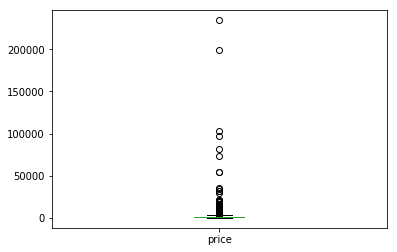

In [22]:
books['price'].plot.box()

書籍の値段は50,000円以上というかなり高価なものがあることも判明。作品集や限定版などが、高価な値段になっている模様

In [23]:
books[books['price']>50000]

,title,authors,price,published_date,head,detail,icons,ebook
431,流転の海 愛蔵版 全9冊,宮本輝,54000,発売日：2018/10/31,日本文学史の金字塔となる大作「流転の海」\r\n完結記念の愛蔵版全9冊セット三大特典付。,大河小説「流転の海」の完結を記念する三〇〇部限定の愛蔵版。オリジナル布装の特装本全9巻と、主...,[],False
7137,宮本武蔵（全20巻）,吉川英治作,234514,発売日：2002/12/10,NaN,“話芸の神様”徳川夢声が生涯をかけて朗読に取り組んだ「宮本武蔵」。1961年からラジオ放送さ...,['特設特設ページ公開中！'],False
7382,河野多惠子全集 全10巻セット,河野多惠子,73397,発売日：2002/04/10,NaN,「塀の中」「幼児狩り」「蟹」等の初期短篇、「不意の声」「回転扉」「一年の牧歌」「みいら採り猟...,[],False
7604,平家物語（全12巻）,木下順二話解説,54000,発売日：2001/08/25,NaN,琵琶法師たちの口承によって、時代を超えて語り継がれてきた古典文学の傑作『平家物語』を劇団前進...,['特設特設ページ公開中！'],False
8284,愛蔵版 円周の羊 ―望月通陽作品集―,望月通陽,199223,発売日：1996/12/18,NaN,作者手染め印度絹布・羊革背継ぎ厚表紙丸背装／オリジナル・ブロンズレリーフ／レリーフ額装〔開き...,[],False
9197,茶の本 茶碗（限定版）,林屋晴三,102600,発売日：1978/06/22,NaN,数多い茶碗のなかから三十碗を精選し、多角的撮影でその美に迫る「名碗抄」、茶碗とそれにゆかり深...,[],False
9213,限定版 茶の本 用と美,田中仙翁,97714,発売日：1977/12/12,NaN,茶の歴史の上で、いろいろな道具がいかに用いられてきたか。茶会記等の史料をもとに、由緒ある茶席...,[],False
9255,限定版 日月星辰,高山辰雄,82285,発売日：1976/10/03,NaN,伝統的な屏風の様式に現代の息吹きを与え、絢爛たる彩管で、人間世界を謳いあげた八双全図を、原色...,[],False


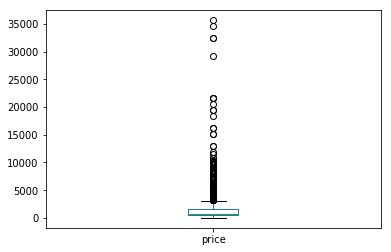

In [24]:
books[books['price']<50000]['price'].plot.box()

In [25]:
books[books['price']<50000]['price'].describe()

count     9973.000000
mean      1373.533841
std       1634.116114
min          0.000000
25%        594.000000
50%        778.000000
75%       1620.000000
max      35640.000000
Name: price, dtype: float64

50,000円以上という高価な外れ値を除いて、書籍の値段を見てみると、平均1378円という常識的な価格になっていることがわかる。

## 発売日のクリーニング

In [27]:
books['published_date'] = pd.to_datetime(books['published_date'].str.replace(r'.*：', ''))

In [28]:
books['year'] = books['published_date'].apply(lambda x: x.year)

In [29]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9121 entries, 0 to 9860
Data columns (total 9 columns):
title             9121 non-null object
authors           9121 non-null object
price             9121 non-null int64
published_date    9121 non-null datetime64[ns]
head              7755 non-null object
detail            9105 non-null object
icons             9121 non-null object
ebook             9121 non-null bool
year              9121 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 650.2+ KB


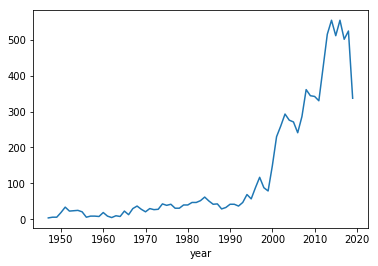

In [30]:
books.groupby(['year'])['title'].count().plot()

新潮社の書籍は2000年頃から急激に増加していることがわかる。2010年あたりにさらに大幅な増加があり、現在は年に500~600程度の出版がある様子。

## 受賞作品に関して

In [31]:
books['icons'].value_counts()

[]                                                                                                                                   6667
False                                                                                                                                1287
['特設特設ページ公開中！']                                                                                                                       148
['100冊新潮文庫の100冊']                                                                                                                      62
['受賞第41回 新風賞 ']                                                                                                                        14
['映画化赤毛のアン\u3000卒業（2018年11月公開）', '映画化赤毛のアン 初恋（2018年10月公開）', '映画化赤毛のアン（2017年5月公開）']                                                     11
['テレビ化連続ドラマＷ「沈まぬ太陽」（2016年5月放映）', '映画化沈まぬ太陽（2009年10月公開）']                                                                               10
['映画化ソロモンの偽証\u3000後篇・裁判（2015年4月公開）

`icons`のコラムには、映画化やテレビ化、受賞などの情報が載せられている模様

受賞作品だけを抽出してみる。

In [75]:
prize = books[books['icons'].str.contains('賞')]

In [76]:
prize['icons'].value_counts()

['受賞第41回 新風賞 ']                                                                                                      14
['受賞第47回 読売文学賞 小説賞']                                                                                                  6
['受賞第23回 野間文芸賞 ']                                                                                                     5
['受賞第1回 吉川英治文庫賞  ', '舞台化ミュージカルしゃばけ（2017年1月公演）']                                                                       5
['受賞第54回 読売文学賞 小説賞']                                                                                                  4
['受賞第63回 毎日出版文化賞 文学・芸術部門', '特設特設ページ公開中！']                                                                             4
['受賞第56回 毎日出版文化賞 人文・社会部門']                                                                                            4
['受賞第1回 吉川英治文庫賞 ', '舞台化ミュージカルしゃばけ（2017年1月公演）']                                                                        4
['受賞第2回 吉川英治文庫賞 ']                      

`icons`コラムには、受賞が第何回のものであるかが記載されている。

同一の賞に複数の書籍が受賞しているものがあるが、これには2つのパターンが考えられる。

- 受賞作品が、シリーズものとしてまとめて受賞している場合
- 複数の新潮社の著者が、同一の賞に受賞している場合

ここではシリーズものでまとめて受賞した場合には、1つの受賞として考えておきたいので、`icons`と`authors`の2つのコラムが同一のものは`duplicated`メソッドを用いて削除する

In [77]:
prize_duplicated = prize[~prize.duplicated(subset=['icons', 'authors'])]

In [78]:
prize_duplicated['icons'].value_counts()

['受賞第10回 野間文芸賞 ']                                                                                                                                                                                                                                           3
['受賞第15回 R-18文学賞 ']                                                                                                                                                                                                                                         2
['受賞第61回 芥川龍之介賞 ']                                                                                                                                                                                                                                          2
['受賞第32回 芥川龍之介賞 ']                                                                                                                                                                                                                            

In [79]:
for col in prize_duplicated['icons'].value_counts().index:
    print(col)
    print(prize_duplicated[prize_duplicated['icons']==col][['title', 'authors', 'year']])
    print('\n')

['受賞第10回 野間文芸賞 ']
     title authors  year
7485   おはん   宇野千代作  2001
9610   おはん    宇野千代  1965
9642    女坂    円地文子  1961


['受賞第15回 R-18文学賞 ']
                title authors  year
818   1ミリの後悔もない、はずがない    一木けい  2018
1035  夜空に泳ぐチョコレートグラミー   町田そのこ  2017


['受賞第61回 芥川龍之介賞 ']
            title authors  year
4030  赤頭巾ちゃん気をつけて     庄司薫  2012
7520          深い河   田久保英夫  2001


['受賞第32回 芥川龍之介賞 ']
            title authors  year
7209   アメリカン・スクール    小島信夫  2002
9608  プールサイド小景・静物    庄野潤三  1965


['受賞第20回 島清恋愛文学賞 ']
           title authors  year
1923        あとかた     千早茜  2016
2475  アスクレピオスの愛人    林真理子  2015


['受賞第31回 芥川龍之介賞 ']
        title authors  year
7767       驟雨  吉行淳之介作  2001
9577  原色の街・驟雨   吉行淳之介  1966


['受賞第28回 芥川龍之介賞 ']
                   title authors  year
6967           或る「小倉日記」伝   松本清張作  2003
9596  或る「小倉日記」伝　傑作短編集〔一〕    松本清張  1965


['受賞第48回 新潮新人賞 ']
        title authors  year
819   ナイス・エイジ    鴻池留衣  2018
1325  縫わんばならん    古川真人  2017


['受賞第33回 芥川龍之介賞 ']
         title authors  year
7457  

    title authors  year
456     眩   朝井まかて  2018


['受賞第9回 読売文学賞 小説賞']
     title authors  year
9632   杏っ子    室生犀星  1962


['受賞第15回 泉鏡花文学賞 ']
         title authors  year
7208  アマノン国往還記   倉橋由美子  2002


['受賞第68回 芸術選奨文部科学大臣賞 ']
       title authors  year
1158  カストロの尻   金井美恵子  2017


['受賞第7回 星雲賞 日本長編部門', '映画化七瀬ふたたび（2010年10月公開）', 'テレビ化七瀬ふたたび（2008年10月放映）']
       title authors  year
9178  七瀬ふたたび    筒井康隆  1978


['受賞第16回 歴史文学賞 ']
     title authors  year
1518  和算の侍     鳴海風  2016


['受賞第16回 読売文学賞 評論・伝記賞']
          title authors  year
8611  日本百名山　新装版    深田久弥  1991


['受賞第8回 山本周五郎賞 ', '映画化閉鎖病棟―それぞれの朝―（2019年11公開予定）']
     title authors  year
8248  閉鎖病棟    帚木蓬生  1997


['受賞第66回 芸術選奨文部科学大臣賞 ', '100冊新潮文庫の100冊']
      title authors  year
533  水曜日の凱歌    乃南アサ  2018


['受賞第23回 講談社科学出版賞 ']
     title authors  year
5948   渋滞学    西成活裕  2006


['受賞第14回 山本周五郎賞 ']
     title authors  year
6851  五年の梅   乙川優三郎  2003


['受賞第68回 毎日出版文化賞 ']
       title authors  year
1680  ゼツメツ少年     重松清  2016


['受賞第2回 JTB紀行文学大賞 

        title authors  year
310  名もなき星の哀歌   結城真一郎  2019


['受賞第16回 司馬遼太郎賞 ']
                       title authors  year
3943  未完のファシズム―「持たざる国」日本の運命―    片山杜秀  2012


['受賞第63回 芥川龍之介賞 ']
     title authors  year
7497  無明長夜    吉田知子  2001


['受賞第148回 直木三十五賞 ', '舞台化何者（2017年11月公演）', '映画化何者（2016年10月公開）', '100冊新潮文庫の100冊']
     title authors  year
2227    何者   朝井リョウ  2015


['受賞第42回 大宅壮一ノンフィクション賞 ']
     title authors  year
3213  ヤノマミ     国分拓  2013


['受賞第9回 Twitter文学賞 （海外）']
      title    authors  year
514  最初の悪い男  ミランダ・ジュライ  2018


['受賞第38回 芥川龍之介賞 ']
          title authors  year
9660  パニック・裸の王様     開高健  1960


['受賞第22回 毎日出版文化賞 文学・芸術部門']
     title authors  year
9005  輝ける闇     開高健  1982


['受賞第3回 新潮ミステリー大賞 ']
         title authors  year
45  夏をなくした少年たち    生馬直樹  2019


['受賞第69回 野間文芸賞 ']
       title authors  year
541  その姿の消し方    堀江敏幸  2018


['受賞第42回 野間児童文芸賞 ']
       title authors  year
5899  狐笛のかなた   上橋菜穂子  2006


['受賞第14回 R-18文学賞 読者賞']
          title authors  year
700  くたばれ地下アイドル   小林早代子  

            title authors  year
7909  ハワイイ紀行【完全版】    池澤夏樹  2000


['受賞第19回 野間文芸賞 ', '100冊新潮文庫の100冊']
     title authors  year
9468   黒い雨    井伏鱒二  1970


['受賞第25回 山本周五郎賞 ', '100冊新潮文庫の100冊']
         title authors  year
2808  楽園のカンヴァス    原田マハ  2014


['受賞第38回 講談社ノンフィクション賞 ', '受賞第38回 講談社ノンフィクション賞 ', '受賞第21回 AICT演劇評論賞 ', '受賞第35回 新田次郎文学賞 ']
                   title authors  year
2027  つかこうへい正伝　1968－1982   長谷川康夫  2015


['受賞第9回 尾崎秀樹記念・大衆文学研究賞 研究・考証部門']
       title authors  year
7610  捕物帳の系譜    縄田一男  2001


['受賞第30回 山本周五郎賞 ']
         title authors  year
184  明るい夜に出かけて   佐藤多佳子  2019


['受賞第15回 芸術選奨文部科学大臣賞 文学']
               title authors  year
8604  人間の運命　〈全七冊セット〉   芹沢光治良  1991


['受賞第15回 蓮如賞 ']
                  title authors  year
1288  宮沢賢治の真実―修羅を生きた詩人―     今野勉  2017


['受賞第3回 読売文学賞 小説賞', '映画化野火（2015年7月公開）', '100冊新潮文庫の100冊']
     title authors  year
9735    野火    大岡昇平  1954


['受賞第44回 大佛次郎賞 ', '受賞第70回 野間文芸賞 ']
       title authors  year
1425  土の記（上）     高村薫  2016


['受賞第70回 読売文学賞 評論・伝記賞'

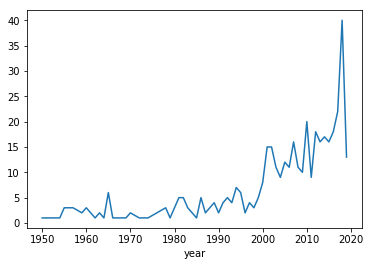

In [37]:
prize_duplicated.groupby(['year'])['title'].count().plot()

なんらかの受賞をしている作品の出版数も年々増加しており、2010年以降は安定して20冊以上の受賞作品を輩出。2018年には過去最高数とも言える41冊もの受賞を記録。

毎年30~40冊もの作品が何らかの受賞をすると考えると、著名な作家になるために、何らかの賞を受賞するのは最低条件と考えても良さそうである。何の賞も獲得できないようでは、作家としての道は厳しそう。

In [38]:
prize[prize['icons']=='受賞第41回 新風賞 ']

,title,authors,price,published_date,head,detail,icons,ebook,year


In [39]:
for col in prize['icons'].value_counts().index:
    print(prize[prize['icons']==col][['title', 'authors']])
    print('\n')

                            title authors
5885          ローマ世界の終焉―ローマ人の物語XV―    塩野七生
6129          キリストの勝利―ローマ人の物語XIV―    塩野七生
6430           最後の努力―ローマ人の物語XIII―    塩野七生
6771           迷走する帝国―ローマ人の物語XII―    塩野七生
7134           終わりの始まり―ローマ人の物語XI―    塩野七生
7484       すべての道はローマに通ず―ローマ人の物語X―    塩野七生
7877             賢帝の世紀―ローマ人の物語IX―    塩野七生
8010           危機と克服―ローマ人の物語VIII―    塩野七生
8086         悪名高き皇帝たち―ローマ人の物語VII―    塩野七生
8232          パクス・ロマーナ―ローマ人の物語VI―    塩野七生
8348   ユリウス・カエサル ルビコン以後―ローマ人の物語V―    塩野七生
8391  ユリウス・カエサル ルビコン以前―ローマ人の物語IV―    塩野七生
8461            勝者の混迷―ローマ人の物語III―    塩野七生
8523           ハンニバル戦記―ローマ人の物語II―    塩野七生


                        title authors
8203  ねじまき鳥クロニクル―第1部 泥棒かささぎ編―    村上春樹
8204   ねじまき鳥クロニクル―第2部　予言する鳥編―    村上春樹
8205    ねじまき鳥クロニクル―第3部　鳥刺し男編―    村上春樹
8397     ねじまき鳥クロニクル　第3部　鳥刺し男編    村上春樹
8485   ねじまき鳥クロニクル　第1部　泥棒かささぎ編    村上春樹
8486    ねじまき鳥クロニクル　第2部　予言する鳥編    村上春樹


            title authors
7988  漱石とその時代　第五部     江藤淳
8304  漱石とその時代　第四部     江藤淳
8509  漱石とその時代　第三部     

     title authors
8303     櫂   宮尾登美子


       title authors
500  不連続殺人事件    坂口安吾


      title authors
5115  おぱらばん    堀江敏幸


      title authors
5562  夢の守り人   上橋菜穂子


        title authors
6309  六〇〇〇度の愛   鹿島田真希


     title authors
3980  苦役列車    西村賢太


      title authors
2568  太陽・惑星    上田岳弘


     title authors
9051    沈黙    遠藤周作


             title authors
6198  ドン・キホーテ（全4巻）  セルバンテス


      title authors
7899  魚雷艇学生    島尾敏雄


     title authors
2182    残穢   小野不由美


    title authors
144    黄落    佐江衆一


     title authors
9654   金閣寺   三島由紀夫


       title authors
4523  婚約のあとで   阿川佐和子


                 title authors
11  狂うひと―「死の棘」の妻・島尾ミホ―    梯久美子


          title authors
5680  地球システムの崩壊    松井孝典


     title authors
3346  きことわ   朝吹真理子


     title authors
3507    俺俺    星野智幸


     title authors
8153    火車   宮部みゆき


     title authors
7350  暢気眼鏡    尾崎一雄


     title authors
1060   指の骨    高橋弘希


     title authors
7464    逸民    小川国夫


     title authors
8675     百    色川武大


     title

       title  authors
640  一発屋芸人列伝  山田ルイ53世


      title authors
9603  海辺の光景   安岡章太郎


     title authors
3026  ぬるい毒   本谷有希子


      title authors
7173  広場の孤独    堀田善衞


     title authors
5898    潤一    井上荒野


      title authors
9688  太陽の季節   石原慎太郎


       title authors
909  バテレンの世紀    渡辺京二


     title authors
6597   エイジ     重松清


     title authors
3568  還れぬ家    佐伯一麦


      title authors
6145  ぬしさまへ     畠中恵


              title authors
1033  中国はなぜ軍拡を続けるのか    阿南友亮


          title authors
4788  果断―隠蔽捜査2―     今野敏


     title authors
4581  切れた鎖    田中慎弥


          title authors
7839  人間万事塞翁が丙午    青島幸男


              title authors
1381  ただしくないひと、桜井さん    滝田愛美


                      title authors
6120  ヨッパ谷への降下―自選ファンタジー傑作集―    筒井康隆


     title authors
1057    満願    米澤穂信


       title authors
9670  ビルマの竪琴    竹山道雄


            title authors
3761  ふがいない僕は空を見た     窪美澄


         title authors
8578  高円寺純情商店街   ねじめ正一


          title authors
5643  君たちに明日はない    垣根涼介


         title a